## Distribution of Simple Returns and Log Returns 

### Import Dependencies 

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import datetime as dt

import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = "plotly"

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

### Set Time Horizon and Fetch Stock Data

In [2]:
# Set time horizon
end = dt.datetime.now()
start = end -dt.timedelta(days=800)
end, start

(datetime.datetime(2023, 3, 14, 16, 52, 51, 891101),
 datetime.datetime(2021, 1, 3, 16, 52, 51, 891101))

In [3]:
# Fetch stock data
df = pdr.get_data_yahoo("MSFT", start, end)

[*********************100%***********************]  1 of 1 completed


### Stock Data Exploration

In [4]:
# View 1st 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,213.342010,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,213.547821,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,208.010666,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,213.930023,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,215.233475,22956200


In [5]:
# View last 5 rows 
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-08,254.039993,254.539993,250.809998,253.699997,253.699997,17340200
2023-03-09,255.820007,259.559998,251.580002,252.320007,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,253.919998,33294100
2023-03-14,247.399994,258.480011,255.899994,257.410004,257.410004,3602103


In [6]:
# Get the Open Price in the first day
df.iat[0,0]

222.52999877929688

In [7]:
# Get last Volume of the dataset
df.iat[-1,-1]

3602103

In [8]:
# Get data in the last row
df.iloc[-1]

Open         2.474000e+02
High         2.584800e+02
Low          2.559000e+02
Close        2.574100e+02
Adj Close    2.574100e+02
Volume       3.602103e+06
Name: 2023-03-14 00:00:00, dtype: float64

In [9]:
# Get data in the first row
df.iloc[0]

Open         2.225300e+02
High         2.230000e+02
Low          2.148100e+02
Close        2.176900e+02
Adj Close    2.133420e+02
Volume       3.713010e+07
Name: 2021-01-04 00:00:00, dtype: float64

In [10]:
# Get the sum of NaN in each column
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Explore if you have have any NaN
df.isna().values.any()

False

In [12]:
# Explore if you have any duplicated value or row
print(df.duplicated().values.any())

False


In [13]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

In [14]:
# Get Summary of the data 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,270.294040,273.196630,267.322789,270.370942,267.478207,2.882411e+07
std,31.610137,31.570065,31.265854,31.483452,30.974603,1.028468e+07
min,212.169998,214.509995,211.940002,212.250000,208.010666,3.602103e+06
25%,244.662498,246.637497,242.187496,244.912502,242.530186,2.239125e+07
50%,262.494995,266.235001,260.145004,263.035004,261.290268,2.667820e+07
75%,293.410004,296.512505,290.307495,294.440010,290.813889,3.320508e+07
max,344.619995,349.670013,342.200012,343.109985,339.075592,9.042890e+07


In [15]:
# Obtain information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2021-01-04 to 2023-03-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       552 non-null    float64
 1   High       552 non-null    float64
 2   Low        552 non-null    float64
 3   Close      552 non-null    float64
 4   Adj Close  552 non-null    float64
 5   Volume     552 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 30.2 KB


### Simple Returns  

In [16]:
# Calculate Daily Simple Returns 
simple_returns = df["Adj Close"]/ df["Adj Close"].shift(1) - 1  #  df["Adj Close"].pct_change()
simple_returns.dropna()

Date
2021-01-05    0.000965
2021-01-06   -0.025929
2021-01-07    0.028457
2021-01-08    0.006093
2021-01-11   -0.009699
                ...   
2023-03-08   -0.001771
2023-03-09   -0.005439
2023-03-10   -0.014783
2023-03-13    0.021441
2023-03-14    0.013745
Name: Adj Close, Length: 551, dtype: float64

In [17]:
df["Adj Close"].plot().update_layout(autosize=False, width=800, height = 500)

In [18]:
# Get hold of the First and Last Adjusted Price
print("First:", df["Adj Close"][0], "Last:", df["Adj Close"][-1])

First: 213.34201049804688 Last: 257.4100036621094


In [19]:
# Calculate mean of simple returns 
simple_returns.mean()

0.0005100280660531794

In [20]:
# Get hold of the last price using product function 
df["Adj Close"][0] * np.prod([(1 + Rt) for Rt in simple_returns])

nan

### Log Returns

In [21]:
# Compute log returns 
log_returns = (np.log(df["Adj Close"]/df["Adj Close"].shift(1))).dropna()


In [22]:
log_returns

Date
2021-01-05    0.000964
2021-01-06   -0.026271
2021-01-07    0.028060
2021-01-08    0.006074
2021-01-11   -0.009746
                ...   
2023-03-08   -0.001772
2023-03-09   -0.005454
2023-03-10   -0.014893
2023-03-13    0.021214
2023-03-14    0.013651
Name: Adj Close, Length: 551, dtype: float64

In [23]:
# Mean of log returns 
log_returns.mean()

0.0003407869285026516

In [24]:
df["Adj Close"][0] * np.exp(log_returns.mean() * len(log_returns))

257.4100036621096

Note: 
**Simple Returns** cannot be used to model **Normal Distribution**: **Reason**: Product of normally distributed variables is not normally distributed.

**Log Returns** are used to model **Normal Distribution**: **Reason**: Sum of normally distributed variables follows **Normal Distribution** | **Log Distribution** bounds stock prices to *zero (0)*. Nice property since it is consistent with reality

### Histogram of Log Returns


In [25]:
log_returns.plot(kind="hist").update_layout(autosize=False, width=800, height=500)

#### Do Financial Data follow Normal Distribution?

In [26]:
# Sort the log returns from worst case to best case
sorted_log_returns = log_returns.tolist()
sorted_log_returns.sort()
sorted_log_returns

[-0.08029536866393819,
 -0.05654758120909541,
 -0.052191522835983335,
 -0.04659874383038185,
 -0.04558711878389498,
 -0.04472877905527757,
 -0.044531793958329756,
 -0.0433385208221774,
 -0.04324426245100348,
 -0.04271120592237271,
 -0.04184489749662381,
 -0.040229920966850144,
 -0.039731098848473784,
 -0.03935132474475194,
 -0.03914407424488642,
 -0.03850881884947395,
 -0.03812146639482538,
 -0.037645361789185344,
 -0.03729265864268453,
 -0.03687527725342704,
 -0.03600893602982606,
 -0.03377367467134982,
 -0.033129634836665506,
 -0.032438736812684825,
 -0.03226410357565596,
 -0.030085875938141528,
 -0.02980238368629098,
 -0.02979462238255652,
 -0.029719364843994105,
 -0.02960552046249641,
 -0.02956773751829887,
 -0.028783396493911366,
 -0.028693523632698593,
 -0.027493650666269395,
 -0.027457798376187458,
 -0.027351400932660537,
 -0.02734051692176126,
 -0.027174263948101893,
 -0.027139247854811446,
 -0.027023868725175912,
 -0.026983455136297498,
 -0.026948076139030445,
 -0.026938429525

In [27]:
# Get hold of both Worst Case and Best Case 
worst_case = sorted_log_returns[0]
best_case = sorted_log_returns[-1]

# Normalise the data
stdDev_worst = (worst_case - log_returns.mean()) / log_returns.std()
stdDev_best = (best_case - log_returns.mean()) / log_returns.std()


#Normal Distribution: 99.7% of data is within 3 Standard Deviations away from the mean (Empirical Rule)
print("Std Deviation of Worst %.2f Best %.2f" %(stdDev_worst, stdDev_best)) 

Std Deviation of Worst -4.38 Best 4.28


In [28]:
from scipy.stats import norm

In [29]:
# Given  that is StdDev > 3 in both cases let us get the probability
print("Probability of Worst %.6f Best %.6f" %(norm(0,1).pdf(stdDev_worst), norm(0,1).pdf(stdDev_best)))

Probability of Worst 0.000027 Best 0.000043


### Testing for Normal Distribution  

**Three** ways can be used to test for normality. These include: **Q-Q** or **Quantile Quantile** plots, **Box** plots and **Hypothesis Testing/Statistical Inference**

#### Q-Q or Quantile Quantile Plots

In [30]:
import pylab 
import scipy.stats as stats

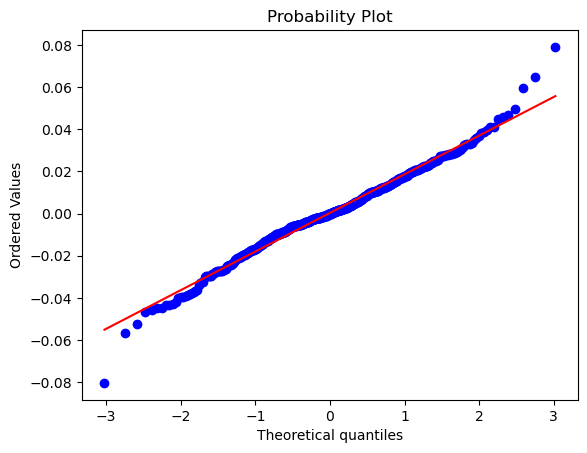

In [31]:
stats.probplot(log_returns, dist="norm", plot=pylab)
pylab.show()

#### Box Plot

In [32]:
log_returns.plot(kind="box").update_layout(autosize=False, width=800, height=500)

### Hypothesis Testing/Statistical Inference

Assists in getting a more objective answer

**Kolmogorov-Smirnov test** or **Shapiro Wilk test** are used to test for Normal Distribution

#### Kolmogorov-Smirnov Test 

**Kolmogorov-Smirnov test**: Computes the distance between **Empirical Distribution** and **Theoritical Distribution**

KS test is called **Kolmogorov-Smirnov Statistics** which follows **Kolmogorov-Smirnov Distribution** when *null hypothesis* is *True*

If the observed data perfectly follow normal distribution, KS Statistics will be *Zero(0)*.  P-Value is used to determine when the difference is large enough to reject the null hypothesis

KS Statistics can be used for any distribution 

In [33]:
ks_stat, p_value = stats.kstest(log_returns, "norm")
print(ks_stat, p_value)
if p_value > 0.05:
    print("Probably Gaussian")
else:
    print("Probably NOT Gaussian")

0.4759718705133163 3.4056896453937296e-115
Probably NOT Gaussian


#### Shapiro Wilk test

**Shapiro Wilk test**: Powerful when testing for Normal Distribution. Specific to Normal Distribution. Cannot be used for any other distribution 

In [34]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print("Probably Gaussian")
else:
    print("Probably NOT Gaussian")

0.986392080783844 5.135971150593832e-05
Probably NOT Gaussian
